<a href="https://colab.research.google.com/github/mabataki2/AI-Class/blob/main/Week3/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------


df = pd.read_csv("/content/drive/MyDrive/weather.csv").dropna()

# 데이터 누수 방지를 위해 RISK_MM 열과 사용하지 않을 Date, Location 열을 제거
df = df.drop(columns=["RISK_MM", "Date", "Location"])
df  # print(df) 와 동일

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,38,15,1016.1,1010.8,1,3,20.4,30.0,No,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,45,22,1020.0,1016.9,0,1,17.2,28.2,No,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,63,47,1024.0,1022.8,3,2,14.5,18.3,No,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,69,39,1021.0,1016.2,6,7,15.8,25.9,No,No


In [61]:

#레이블 불균형 확인

df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,268
Yes,60


Text(0.5, 1.0, 'RainTomorrow')

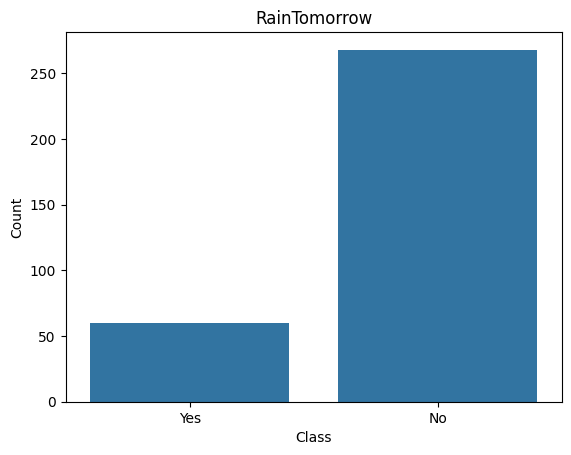

In [62]:

# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="RainTomorrow")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("RainTomorrow")

In [63]:
# 결측치 확인
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [64]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


In [65]:
df.columns  # 컬럼명 확인

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [66]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [67]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,90,111,0,15,43,7,8,12,7,2,...,29,15,93,82,7,7,95,129,0,1
1,138,130,16,20,75,1,12,0,13,1,...,41,22,37,27,5,3,123,145,1,1
2,135,106,16,27,24,7,33,3,5,2,...,43,55,20,22,8,7,103,99,1,1
3,133,42,43,34,69,7,20,14,13,15,...,23,42,7,21,2,7,88,50,1,1
4,86,46,13,26,84,10,18,10,2,10,...,29,35,84,113,7,7,68,60,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,100,152,0,36,99,6,29,10,7,3,...,1,2,64,46,1,3,148,167,0,0
362,81,141,0,51,104,3,17,6,6,0,...,6,8,95,98,0,1,120,160,0,0
363,125,78,0,40,36,2,14,1,1,5,...,24,33,131,147,3,2,96,81,0,0
364,125,130,0,23,50,7,16,11,14,2,...,30,25,103,91,6,7,107,146,0,0


In [68]:
# 입력과 출력 분리

X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

In [69]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,90,111,0,15,43,7,8,12,7,2,9,29,15,93,82,7,7,95,129,0
1,138,130,16,20,75,1,12,0,13,1,7,41,22,37,27,5,3,123,145,1
2,135,106,16,27,24,7,33,3,5,2,1,43,55,20,22,8,7,103,99,1
3,133,42,43,34,69,7,20,14,13,15,11,23,42,7,21,2,7,88,50,1
4,86,46,13,26,84,10,18,10,2,10,13,29,35,84,113,7,7,68,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,100,152,0,36,99,6,29,10,7,3,22,1,2,64,46,1,3,148,167,0
362,81,141,0,51,104,3,17,6,6,0,8,6,8,95,98,0,1,120,160,0
363,125,78,0,40,36,2,14,1,1,5,3,24,33,131,147,3,2,96,81,0
364,125,130,0,23,50,7,16,11,14,2,13,30,25,103,91,6,7,107,146,0


In [70]:
y

,RainTomorrow
0,1
1,1
2,1
3,1
4,0
...,...
361,0
362,0
363,0
364,0


In [71]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)


In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((262, 20), (66, 20), (262,), (66,))

In [73]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

In [74]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [75]:

# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [76]:
# 정답값 출력

y_test

,RainTomorrow
365,0
28,0
36,1
301,0
305,0
...,...
356,0
72,1
320,0
81,0


In [77]:

#예측값 출력

dt_y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

In [78]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.7727
[[45  9]
 [ 6  6]]
=== RF Test Accuracy ===
Random Forest : 0.8030
[[47  7]
 [ 6  6]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9091
[[50  4]
 [ 2 10]]
